# UCF Biomolecular Engineering Lab
## SAXS Data Modeling 

### Background 

Small-angle X-ray scattering (SAXS) is a small-angle scattering technique by which nanoscale density differences in a sample can be quantified. This means that it can determine nanoparticle size distributions, resolve the size and shape of (monodisperse) macromolecules, determine pore sizes, characteristic distances of partially ordered materials, and much more.

This notebook is designed to analyze SAXS data gathered on spherical miscelles with a Gaussian and Log-Normal distribution. Form factor and scattering intensity equations are used to provide fitting functions that allow for greater investigation of micelle characteristics.


#### The following Model Functions for Scattering are provided:
><b>Spheres with Gaussian Size Distribution</b><br>
><b>Spheres with Log-Normal Size Distribution</b><br>

## Sample of Spherical Micelle Plot

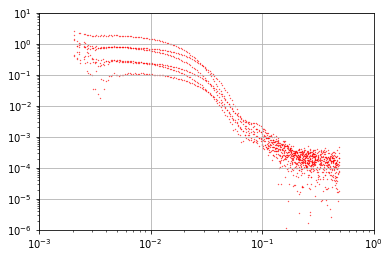

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

sampleData = pd.read_csv('Data_Master.csv')
plt.subplot(111)
plt.scatter(sampleData.q,sampleData.r, s = 0.1, c = 'red') # scatterplot
plt.xlim(0.001, 1)  # (x,y) limits
plt.ylim(1  *10 ** -6, 10) 
plt.xscale('log') # (x,y) scale modifier
plt.yscale('log')
plt.grid(True)

### Gaussian Sphere Modeling Equations and Parameters

Parameters Sample: 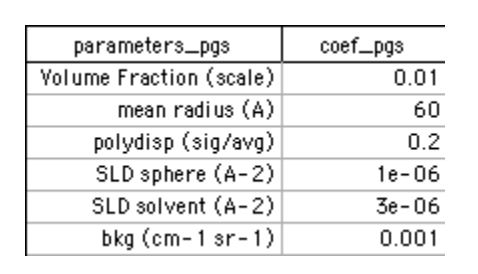



Gaussian Distribution: 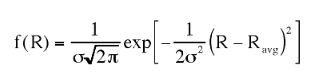






Log Normal Distribution: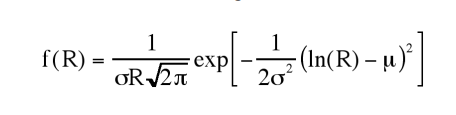

Scattering Amplitude: 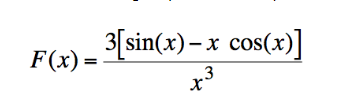

Scattering Intensity: 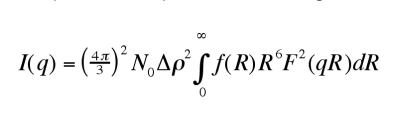

## * Run this cell first * Import Libraries For ALL Distributions

In [84]:
import math # math library
import pandas as pd # excel reader
import numpy as np # math library
import matplotlib.pyplot as plt # plot library
import xlrd # excel worksheet reader
from scipy.integrate import quad # integral
from scipy.stats import norm # normal distribution
from scipy.stats import lognorm


# Read exceldata sheet 

workbook = xlrd.open_workbook('gaussian.xls')

worksheet = workbook.sheet_by_index(0)

# Read in all q and r values from excel spreadsheet
spreadsheet = [[worksheet.cell_value(i,j) for i in range (1, worksheet.nrows)]
                                          for j in range (0,1)]

## Spheres With Gaussian Size Distribution

In [85]:
# Declare spherical micelle parameters 
Volume_Fraction = 0.01
Ravg = 60
polydispersity = 0.2
SLD_sphere = 10.64
SLD_solvent = 9.42
deltaRho = SLD_sphere - SLD_solvent
sigma = polydispersity*Ravg
R = norm.rvs(loc = Ravg, scale = sigma, size = 2000, random_state = 3)
bkg = 0.001

In [86]:
# Return estimate for spherical micelle radius using gaussian distribution
# with polydispersity, R, and Ravg as variables.
def gaussianDistribution(R, Ravg, sigma):
    return norm.pdf(R, loc = Ravg, scale = sigma)

#print(gaussianDistribution(R, Ravg, sigma))

In [87]:
# Return scattering amplitude for a sphere using q and R.
def scatteringAmplitude(q, R):
    return (3 * (math.sin(q * R)-(q * R) * math.cos(q * R))) / ((q * R) ** 3)

In [88]:
# Return integral equation component from scattering intensity equation.
def integrand(q, R):
    return gaussianDistribution(R, Ravg, sigma) * (R ** 6) * (scatteringAmplitude(q, R)) ** 2

In [89]:
# Calculate the integral for each q and R value and multiply constant 
# values to integral value.
def scatteringFunction(Volume_Fraction, deltaRho, sigma, R, Ravg):
    values = []
    for i in range (1, worksheet.nrows):
        for j in range (0, 1):
            q = spreadsheet[0][i - 1]
            integral = [quad(integrand, 0, np.inf, args = (q))] 
            #print(integral)
            qScatteringFunction = ((((4 * math.pi)/3) ** 2) * Volume_Fraction * (deltaRho ** 2)) * (integral[0][0]) * (10 ** 8)
            values.append(qScatteringFunction)
    return values
            
yval = []         
yval.extend(scatteringFunction(Volume_Fraction, deltaRho, sigma, R, Ravg))
yval.reverse()
print(yval)

[0.2744008950750082, 0.2634269728707536, 0.25283520235416623, 0.2426184082144464, 0.23276587896677736, 0.22326654602224544, 0.21410723519084052, 0.20527464646236315, 0.19675709956557252, 0.18854292440309384, 0.1806232997926575, 0.17298927591796973, 0.16563226946794815, 0.15854357838103791, 0.15171228244560042, 0.1451278428926903, 0.1387782872397854, 0.13265260526895514, 0.12674142710411346, 0.12103631308159364, 0.11553188909764024, 0.11022310330781684, 0.10510612834932741, 0.10017708928283105, 0.0954307718859644, 0.09086226736875952, 0.08794297946264058, 0.08361200263421817, 0.0781637438216274, 0.07425005250096772, 0.07049051608939348, 0.06688242484694013, 0.06342383946720612, 0.06011201207932295, 0.05694291127478182, 0.05391217013700115, 0.05101379749713668, 0.04824229723209277, 0.04559216987813286, 0.043058521830942546, 0.04063786437891902, 0.03832661391207983, 0.036122142858375755, 0.03402122574810764, 0.0320201375393063, 0.03011499586303181, 0.028300938901388684, 0.0265738037701953

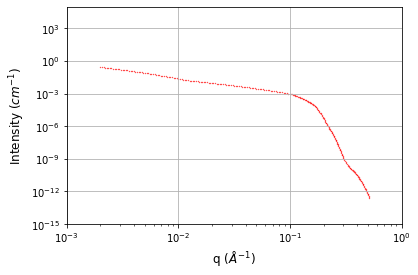

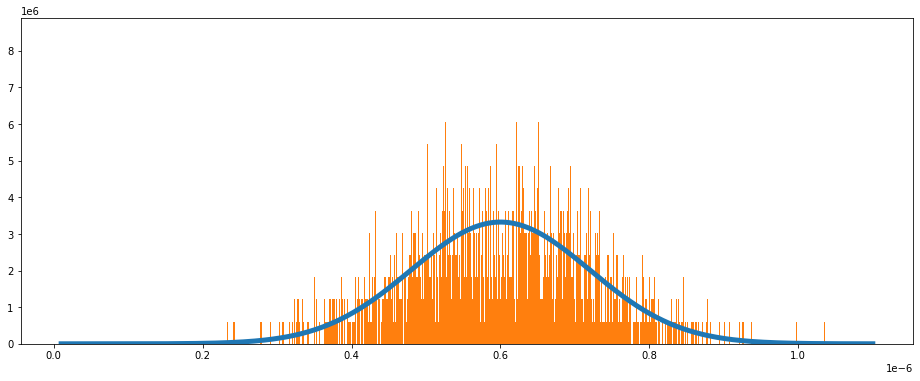

Parameters:

mean (Ravg): 6e-07
median (Ravg): 6e-07
var: 1.4399999999999997e-14
std (Sigma): 1.2e-07




In [94]:
# Plot two sets of miscelle data in a scatterplot. 
def plotSphericalMicellesFit():
    s = pd.read_csv('gaussian.csv')
    plt.subplot(111)
    plt.scatter(s.q, yval, s = 0.1, c = 'red')
    plt.xlim(1 * 10 **-3, 1)
    plt.ylim(1 * 10 **-15, 1 * 10 **5)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('q ($Å^{-1}$)', fontsize = 12)
    plt.ylabel('Intensity ($cm^{-1}$)', fontsize = 12)
    plt.grid(True)
    
# Plot two sets of miscelle data in a histogram. 
def plotGaussianDistribution(R, Ravg, sigma):
    
    Ravg = 60 * (10 ** -8)
    polydispersity = 0.2
    SLD_sphere = 10.64 * (10 ** 10)
    SLD_solvent = 9.42 * (10 ** 10)
    deltaRho = SLD_sphere - SLD_solvent
    sigma = polydispersity * Ravg
    R = norm.rvs(loc = Ravg, scale = sigma, size = 2000, random_state = 3)
    
    #Plot line of best fit for R value distribution.
    x = np.linspace(0.1 * (10 ** -7), (1.1) * (10 ** -6), 500)
    fig, ax = plt.subplots(figsize = (16, 6))
    ax.plot(x, norm.pdf(x, loc=Ravg, scale=sigma), lw = 5)
    
    # Plot histogram to show R value distribution.
    ax.hist(R, bins = 1000, density = True)
    
    plt.show()
    
    # Display parameter values.
    print("Parameters:")
    print("\nmean (Ravg):", norm.mean(Ravg, sigma))
    print("median (Ravg):", norm.median(Ravg, sigma))
    print("var:", norm.var(Ravg, sigma))
    print("std (Sigma):", norm.std(Ravg, sigma))
    print("\n")
    
plotSphericalMicellesFit()
plotGaussianDistribution(R, Ravg, sigma)

# Approach with Polynomial Regression

In [95]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [96]:
spreadsheet = [[worksheet.cell_value(i,j) for i in range (1, worksheet.nrows)]
                                          for j in range (0,3)]

xCoordinates = []
yCoordinates = []

# Considering dataset of 275 points, manually adjust range as seen fit
# first segmented regression analysis
for i in range (1, worksheet.nrows):
    xCoordinates.append([spreadsheet[0][i - 1]])
    yCoordinates.append([spreadsheet[1][i - 1]])

# Segmentation
    
x1 = np.array(xCoordinates[:50])
y1 = np.array(yCoordinates[:50])

x2 = np.array(xCoordinates[50:100])
y2 = np.array(yCoordinates[50:100])

x3 = np.array(xCoordinates[100:200])
y3 = np.array(yCoordinates[100:200])

x4 = np.array(xCoordinates[200:275])
y4 = np.array(yCoordinates[200:275])

In [97]:
def polynomialRegression(x, y, degreeNum):
    poly_features  =  PolynomialFeatures(degree = degreeNum, include_bias = False)
    X_poly  =  poly_features.fit_transform(x.reshape(-1,1))
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(X_poly, y)
    y = poly_reg_model.predict(X_poly)
    return y

In [98]:
y1 = polynomialRegression(x1, y1, 3)
y2 = polynomialRegression(x2, y2, 5)
y3 = polynomialRegression(x3, y3, 9)
y4 = polynomialRegression(x4, y4, 2)


fullFit = []
fullFit.extend(y1)
fullFit.extend(y2)
fullFit.extend(y3)
fullFit.extend(y4)

In [99]:
def plotSegmentedSphericalMicellesFit():
    s = pd.read_csv('gaussian.csv')
    plt.subplot(111)
    plt.scatter(s.q, s.r, s = 0.1, c = 'chartreuse')
    plt.scatter(spreadsheet[0][:50], y1, s = 0.1, c = 'blue')
    plt.scatter(spreadsheet[0][50:100], y2, s = 0.1, c = 'black')
    plt.scatter(spreadsheet[0][100:200], y3, s = 0.1, c = 'red')
    plt.scatter(spreadsheet[0][200:275], y4, s = 0.1, c = 'magenta')
    plt.xlim(1* 10 **-3,1)
    plt.ylim(1* 10 **-5,1)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('q ($Å^{-1}$)', fontsize = 12)
    plt.ylabel('Intensity ($cm^{-1}$)', fontsize = 12)
    plt.grid(True)

In [123]:
def plotFullSphericalMicellesFit():
    s = pd.read_csv('gaussian.csv')
    plt.subplot(111)
    plt.scatter(s.q, s.r, s = 0.1, c = 'purple')
    plt.scatter(spreadsheet[0], fullFit, s = 0.1, c = 'blue')
    plt.xlim(1* 10 **-3, 1)
    plt.ylim(1* 10 **-5, 1)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('q ($Å^{-1}$)', fontsize = 12)
    plt.ylabel('Intensity ($cm^{-1}$)', fontsize = 12)
    plt.grid(True)

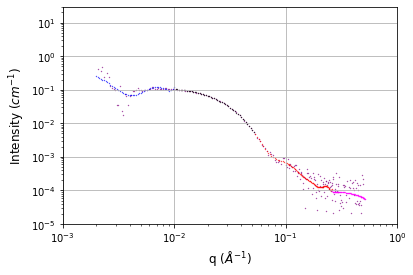

In [124]:
plotSegmentedSphericalMicellesFit()

## Spheres With Log-Normal Size Distribution

In [125]:
# Read exceldata sheet 

workbook = xlrd.open_workbook('lognormal.xls')

worksheet = workbook.sheet_by_index(0)

# Read in all q and r values from excel spreadsheet
spreadsheet = [[worksheet.cell_value(i,j) for i in range (1, worksheet.nrows)]
                                          for j in range (0,1)]

In [126]:
# Declare spherical micelle parameters 
Volume_Fraction = 0.01
Rmed = 60
polydispersity = 0.2
SLD_sphere = 10.64
SLD_solvent = 9.42
deltaRho = SLD_sphere - SLD_solvent
sigma = polydispersity * Rmed
R = lognorm.rvs(s = sigma, loc = Rmed, scale = math.exp(np.log(Rmed)), size = 2000, random_state = 3 )
bkg = 0.001

In [127]:
# Return estimate for spherical micelle radius using gaussian distribution
# with polydispersity, R, and Ravg as variables.
def logNormalDistribution(sigma, R, Rmed):
    return (1 / ((sigma) * R * math.sqrt(2 * math.pi))) * math.exp((-1 / (2 * (sigma ** 2))) * (np.log(R) - np.log(Rmed)) ** 2)

In [128]:
# Return scattering amplitude for a sphere using q and R.
def scatteringAmplitude(q, R):
    return (3 * (math.sin(q * R)-(q * R) * math.cos(q * R))) / ((q * R) ** 3)

In [129]:
# Return integral equation component from scattering intensity equation.
def integrand(q, R):
    return logNormalDistribution(sigma, R, Rmed) * (R ** 6) * (scatteringAmplitude(q, R)) ** 2

In [130]:
# Calculate the integral for each q and R value and multiply constant 
# values to integral value.
def scatteringFunction(Volume_Fraction, deltaRho, sigma, R, Rmed):
    values = []
    for i in range (1, worksheet.nrows):
        for j in range (0,1):
            q = spreadsheet[0][i - 1]
            #print(q)
            integral = [quad(integrand, 0, np.inf, args = (q))] 
            #print(integral[0][0])
            qScatteringFunction = ((((4 * math.pi) / 3) ** 2) * Volume_Fraction * (deltaRho ** 2)) * (integral[0][0]) * 10**8
            values.append(qScatteringFunction)
    return values
            
yval = []         
yval.extend(scatteringFunction(Volume_Fraction, deltaRho, sigma, R, Ravg))
yval.reverse()
print(yval)

[107254.69906462058, 103940.68159280642, 100704.21590468207, 97544.17496183718, 94459.17616969455, 91448.08178225241, 88509.76805445038, 85642.94588328052, 82846.55774466989, 80119.31037506238, 77460.05345036917, 74867.69144006753, 72341.25872694259, 69879.3215093062, 67481.01564259139, 65144.864831102845, 62870.16293670705, 60655.835577715814, 58500.43177698158, 56403.264999421604, 54363.07342070423, 52378.88318071667, 50449.56220629089, 48574.07693575909, 46751.71035025222, 44981.244246911396, 43261.447867890296, 41591.611911851396, 39970.74647140228, 38397.80795500544, 36871.901512868855, 35392.02119765103, 33957.1918874166, 32566.62211587926, 31219.19434464919, 29914.12747090248, 28650.680772012296, 27427.675039421352, 26244.201522440708, 25099.66359513464, 23993.07925383482, 22923.49299657969, 21890.194274686553, 20892.31871595644, 19929.04868530488, 18999.498185431417, 18103.039611242268, 17238.66214095272, 16405.7386959485, 15603.42115792226, 14830.991842534766, 14087.6651120319

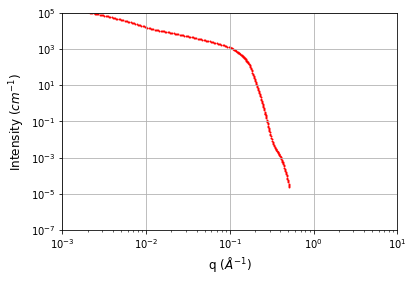

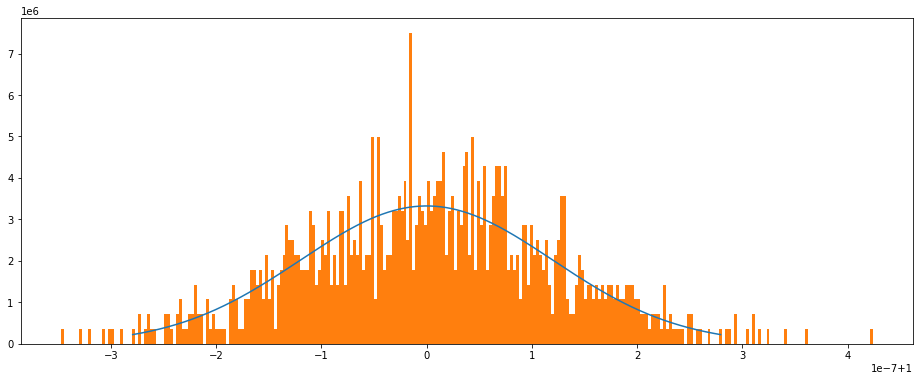

Parameters:

mean (Ravg): 1.0000001200001798
median (Ravg): 1.00000012
var: 3.599343045836053e-13
std (Sigma): 5.99945251321823e-07


In [131]:
# Plot two sets of miscelle data in a scatterplot. 
def plotSphericalMicelles():
    logNormVals = pd.read_csv('lognormal.csv')
    plt.subplot(111)
    plt.scatter(logNormVals.q, yval, s = 0.9, c = 'red')
    plt.xlim(0.001, 10)
    plt.ylim(1 * 10 ** -7, 1 * 10 ** 5)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('q ($Å^{-1}$)', fontsize = 12)
    plt.ylabel('Intensity ($cm^{-1}$)', fontsize = 12)
    plt.grid(True)
    
plotSphericalMicelles()

# Plot two sets of miscelle data in a histogram. 
def plotLogNormalDistribution(R, sigma):
    
    Rmed = 60 * (10 ** -8)
    polydispersity = 0.2
    SLD_sphere = 10.64 * (10 ** 10)
    SLD_solvent = 9.42 * (10 ** 10)
    deltaRho = SLD_sphere - SLD_solvent
    sigma = polydispersity * Rmed
    R = lognorm.rvs(s = sigma, loc = Rmed, scale = math.exp(np.log(Rmed)), size = 2000, random_state = 3 )

    # Plot line of best fit for R value distribution.
    x = np.linspace(lognorm.ppf(0.01, sigma), lognorm.ppf(0.99, sigma), 1000)
    fig, ax = plt.subplots(figsize = (16, 6))
    rv = lognorm(sigma)
    ax.plot(x, rv.pdf(x))
    
    # Plot histogram to show R value distribution.
    r = lognorm.rvs(sigma, size = 1000)
    ax.hist(r, bins = 275, density = True)

    plt.show()
    
    # Display parameter values.
    print("Parameters:\n")
    print("mean (Ravg):", lognorm.mean(Rmed, sigma))
    print("median (Ravg):", lognorm.median(Rmed, sigma))
    print("var:", lognorm.var(Rmed, sigma))
    print("std (Sigma):", lognorm.std(Rmed, sigma))
    
plotLogNormalDistribution(R, sigma)


# Approach with Polynomial Regression

In [132]:
spreadsheet = [[worksheet.cell_value(i,j) for i in range (1, worksheet.nrows)]
                                          for j in range (0,3)]

xCoordinates = []
yCoordinates = []

# Considering dataset of 275 points, manually adjust range as seen fit
# first segmented regression analysis
for i in range (1, worksheet.nrows):
    xCoordinates.append([spreadsheet[0][i - 1]])
    yCoordinates.append([spreadsheet[1][i - 1]])

# Segmentation
    
x1 = np.array(xCoordinates[:50])
y1 = np.array(yCoordinates[:50])

x2 = np.array(xCoordinates[50:100])
y2 = np.array(yCoordinates[50:100])

x3 = np.array(xCoordinates[100:200])
y3 = np.array(yCoordinates[100:200])

x4 = np.array(xCoordinates[200:275])
y4 = np.array(yCoordinates[200:275])

In [133]:
def polynomialRegression(x, y, degreeNum):
    poly_features  =  PolynomialFeatures(degree = degreeNum, include_bias = False)
    X_poly  =  poly_features.fit_transform(x.reshape(-1,1))
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(X_poly, y)
    y = poly_reg_model.predict(X_poly)
    return y

In [134]:
y1 = polynomialRegression(x1, y1, 5)
y2 = polynomialRegression(x2, y2, 5)
y3 = polynomialRegression(x3, y3, 9)
y4 = polynomialRegression(x4, y4, 2)


fullFit = []
fullFit.extend(y1)
fullFit.extend(y2)
fullFit.extend(y3)
fullFit.extend(y4)

In [144]:
def plotSegmentedSphericalMicellesFit():
    s = pd.read_csv('lognormal.csv')
    plt.subplot(111)
    plt.scatter(s.q, s.r, s = 0.1, c = 'purple')
    plt.scatter(spreadsheet[0][:50], y1, s = 0.1, c = 'blue')
    plt.scatter(spreadsheet[0][50:100], y2, s = 0.1, c = 'black')
    plt.scatter(spreadsheet[0][100:200], y3, s = 0.1, c = 'red')
    plt.scatter(spreadsheet[0][200:275], y4, s = 0.1, c = 'magenta')
    plt.xlim(1* 10 **-3,1)
    plt.ylim(1* 10 **-5,3 * 10 **2)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('q ($Å^{-1}$)', fontsize = 12)
    plt.ylabel('Intensity ($cm^{-1}$)', fontsize = 12)
    plt.grid(True)

In [145]:
def plotFullSphericalMicellesFit():
    s = pd.read_csv('lognormal.csv')
    plt.subplot(111)
    plt.scatter(s.q, s.r, s = 0.1, c = 'green')
    plt.scatter(spreadsheet[0], fullFit, s = 0.1, c = 'blue')
    plt.xlim(1* 10 **-3,1)
    plt.ylim(1* 10 **-5,1)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('q ($Å^{-1}$)', fontsize = 12)
    plt.ylabel('Intensity ($cm^{-1}$)', fontsize = 12)
    plt.grid(True)

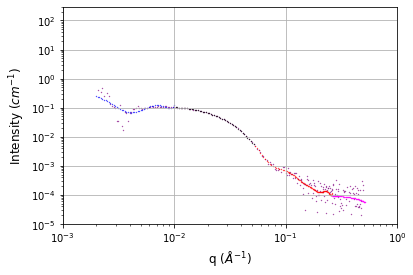

In [147]:
plotSegmentedSphericalMicellesFit()

### References



    
    



[1] Heenan, R. (2016). Polymer_micelle. Retrieved February 15, 2021, from https://www.sasview.org/docs/user/models/polymer_micelle.html